In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.stats.multitest as smt
%matplotlib inline
plt.style.use('seaborn')
!pwd

/Users/jzz0026/Documents/GitHub/SaltBayPond/itag_analysis_v2


In [37]:
dft = pd.read_csv("./arare/alpha_div_collated/shannon.txt",sep="\t")
dft = dft.replace("n/a",np.nan)
sample_col = dft.columns[3:]
dft[sample_col] = dft[sample_col].astype("float")
dft2 = dft.groupby(["sequences per sample"])[sample_col].mean()
tt = []
for each in sample_col:
    tt.append(dft2.loc[dft2[each].last_valid_index(),each])
    
dft3 = pd.DataFrame(tt,sample_col).reset_index()
dft3["type"] = dft3["index"].str.split("_",expand=True)[0]
dft3 = dft3.sort_values("type",ascending=False)
dft3["type2"] = ""
dft3.loc[dft3["type"] == "R1","type2"] = "Salt_pond"
dft3.loc[dft3["type"] == "R2","type2"] = "Salt_pond"
dft3.loc[dft3["type"] == "R2A","type2"] = "Restored"
dft3.loc[dft3["type"] == "SF2","type2"] = "Historic"

In [54]:
dft2.isnull().any(1)
dftt = pd.DataFrame(dft2.iloc[7])
dft4 = pd.merge(dft3,dftt,left_on="index",right_index=True,how="left")
dft5 = dft4.drop(0,1)
dft5

,index,type,type2,140388
23,SF2_C_D2,SF2,Historic,8.604578
22,SF2_C_D1,SF2,Historic,9.676712
21,SF2_B_D2,SF2,Historic,9.354192
20,SF2_B_D1,SF2,Historic,9.405945
19,SF2_A_D2,SF2,Historic,8.770072
18,SF2_A_D1,SF2,Historic,9.023169
6,R2A_A_D1,R2A,Restored,8.990611
7,R2A_A_D2,R2A,Restored,9.771584
8,R2A_B_D1,R2A,Restored,9.785939
9,R2A_B_D2,R2A,Restored,9.049741


(array([  5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,   9. ,   9.5,
         10. ,  10.5]), <a list of 11 Text yticklabel objects>)

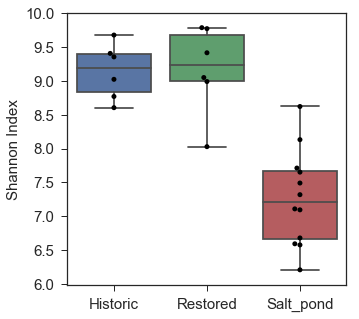

In [56]:
## set type
sns.set_style("white")
sns.set_style("ticks")

#my_pal = {"Salt_pond": "g", "Restored": "b", "Historic":"m"}
plt.figure(figsize=(5,5))
sns.boxplot(x="type2",y=140388,data=dft5)
sns.swarmplot(x="type2",y=140388,data=dft5,color="black", alpha=1)
plt.ylabel("Shannon Index",size=15)
plt.xlabel("")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)